In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib as plt

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(labels=['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace= True)
df['Embarked'].fillna('Q', inplace= True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.replace({"Sex":{"male":0, "female":1},"Embarked" : {"S": 0, "C":1 ,"Q":2 }},inplace= True)
df


<Axes: >

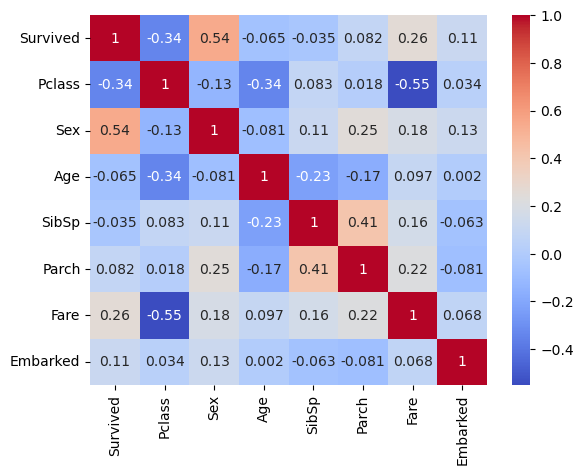

In [5]:
sns.heatmap(df.corr(),annot= True,cmap='coolwarm')

<Axes: xlabel='Importance', ylabel='Feature'>

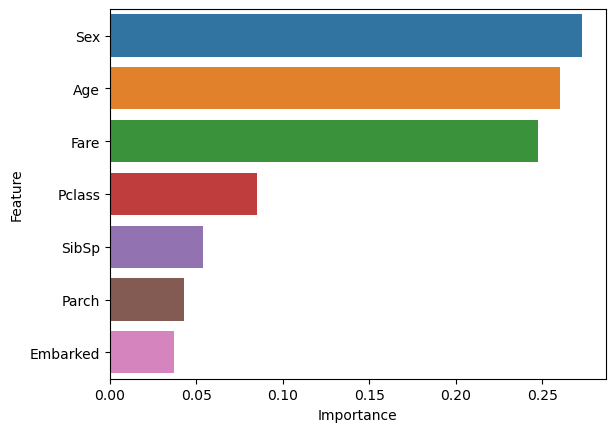

In [6]:
X= df.drop(columns=['Survived'])
Y=df['Survived']
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=0)
model= RandomForestClassifier(random_state=0)
model.fit(X_train,Y_train)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance' ,ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importances)


In [7]:
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7869955156950673
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       283
           1       0.70      0.73      0.71       163

    accuracy                           0.79       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.79      0.79      0.79       446

